<img style="float: right; margin: 0px 0px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQt6eQo8JPYzYO4p6WmxLtccdtJ4X8WR6GzVVKbsMjyGvUDEn1mg" width="300px" height="100px" />

# Trabajando con opciones

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento.

Una opción compleja popular son las llamadas **opciones asiáticas** cuyos pagos dependen de todas las trayectorias del precio de los activos subyacentes. Las opciones cuyos pagos dependen de las trayectorias de los precios de los activos subyacentes se denominan opciones dependientes de la ruta.

Principalmente, se puede resumir que las dos razones con más peso de importancia para utilizar opciones son el **aseguramiento** y la **especulación**.

## Opciones Plan Vainilla: opción de compra y opción de venta europea

Una opción vainilla o estándar es una opción normal de compra o venta que no tiene características especiales o inusuales. Puede ser para tamaños y vencimientos estandarizados, y negociarse en un intercambio.
En comparación con otras estructuras de opciones, las opciones de vanilla no son sofisticadas o complicadas.


## 1. ¿Cómo descargar datos de opciones?

In [2]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

Usando el paquete `pandas_datareader` también podemos descargar datos de opciones. Por ejemplo, descarguemos los datos de las opciones cuyo activo subyacente son las acciones de Apple

In [3]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
# aapl

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-01-17,50.0,call,AAPL200117C00050000,...,2019-11-21 18:57:55,2019-11-07 16:06:35,"{'contractSymbol': 'AAPL200117C00050000', 'str..."
2020-01-17,50.0,put,AAPL200117P00050000,...,2019-11-21 18:57:55,2019-11-08 14:34:24,"{'contractSymbol': 'AAPL200117P00050000', 'str..."
2020-01-17,55.0,call,AAPL200117C00055000,...,2019-11-21 18:57:55,2019-08-08 19:46:38,"{'contractSymbol': 'AAPL200117C00055000', 'str..."
2020-01-17,55.0,put,AAPL200117P00055000,...,2019-11-21 18:57:55,2019-09-30 14:16:34,"{'contractSymbol': 'AAPL200117P00055000', 'str..."
2020-01-17,60.0,call,AAPL200117C00060000,...,2019-11-21 18:57:55,2019-11-06 20:30:58,"{'contractSymbol': 'AAPL200117C00060000', 'str..."
...,...,...,...,...,...,...,...
2021-01-15,390.0,call,AAPL210115C00390000,...,2019-11-21 18:57:58,2019-11-21 16:21:56,"{'contractSymbol': 'AAPL210115C00390000', 'str..."
2021-06-18,390.0,call,AAPL210618C00390000,...,2019-11-21 18:57:58,2019-11-20 16:29:54,"{'contractSymbol': 'AAPL210618C00390000', 'str..."
2021-09-17,390.0,call,AAPL210917C00390000,...,2019-11-21 18:57:58,2019-11-21 15:51:56,"{'contractSymbol': 'AAPL210917C00390000', 'str..."


In [4]:
aapl_opt.loc[0]
aapl_opt.loc[0, 'JSON']

{'contractSymbol': 'AAPL200117C00050000',
 'strike': 50.0,
 'currency': 'USD',
 'lastPrice': 209.41,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 3,
 'openInterest': 3,
 'bid': 212.2,
 'ask': 212.45,
 'contractSize': 'REGULAR',
 'expiration': 1579219200,
 'lastTradeDate': 1573142795,
 'impliedVolatility': 1.873047509765625,
 'inTheMoney': True}

### Conceptos claves
- El precio de la oferta ('bid') se refiere al precio más alto que un comprador pagará por un activo.
- El precio de venta ('ask') se refiere al precio más bajo que un vendedor aceptará por un activo.
- La diferencia entre estos dos precios se conoce como 'spread'; cuanto menor es el spread, mayor es la liquidez de la garantía dada.
- Liquidez: facilidad de convertir cierta opción en efectivo.
- La volatilidad implícita es el pronóstico del mercado de un probable movimiento en el precio de un valor.
- La volatilidad implícita aumenta en los mercados bajistas y disminuye cuando el mercado es alcista.
- El último precio ('lastprice') representa el precio al que ocurrió la última operación, de una opción dada.

Una vez tenemos la información, podemos consultar de qué tipo son las opciones

In [5]:
aapl_opt.loc[:, 'Type']

0       call
1        put
2       call
3        put
4       call
        ... 
1489    call
1490    call
1491    call
1492    call
1493    call
Name: Type, Length: 1494, dtype: object

o en que fecha expiran

In [6]:
pd.set_option('display.max_rows', 10)
aapl_opt.loc[:, 'Expiry']

0      2020-01-17
1      2020-01-17
2      2020-01-17
3      2020-01-17
4      2020-01-17
          ...    
1489   2021-01-15
1490   2021-06-18
1491   2021-09-17
1492   2022-01-21
1493   2020-02-21
Name: Expiry, Length: 1494, dtype: datetime64[ns]

Por otra parte, podríamos querer consultar todas las opciones de compra (call) que expiran en cierta fecha (2020-06-19)

In [7]:
fecha1 = '2020-06-19'
fecha2 = '2021-01-15'
call06 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='call')]
call06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
12,75.0,2020-06-19,call,...,2019-11-21 18:57:58,2019-11-06 20:39:24,"{'contractSymbol': 'AAPL200619C00075000', 'str..."
20,80.0,2020-06-19,call,...,2019-11-21 18:57:58,2019-11-07 15:17:08,"{'contractSymbol': 'AAPL200619C00080000', 'str..."
28,85.0,2020-06-19,call,...,2019-11-21 18:57:58,2019-11-06 19:55:37,"{'contractSymbol': 'AAPL200619C00085000', 'str..."
36,90.0,2020-06-19,call,...,2019-11-21 18:57:58,2019-11-12 16:31:00,"{'contractSymbol': 'AAPL200619C00090000', 'str..."
44,95.0,2020-06-19,call,...,2019-11-21 18:57:58,2019-11-06 20:09:51,"{'contractSymbol': 'AAPL200619C00095000', 'str..."
...,...,...,...,...,...,...,...
1313,300.0,2020-06-19,call,...,2019-11-21 18:57:58,2019-11-21 18:35:13,"{'contractSymbol': 'AAPL200619C00300000', 'str..."
1354,310.0,2020-06-19,call,...,2019-11-21 18:57:58,2019-11-21 16:52:46,"{'contractSymbol': 'AAPL200619C00310000', 'str..."
1392,320.0,2020-06-19,call,...,2019-11-21 18:57:58,2019-11-21 15:20:48,"{'contractSymbol': 'AAPL200619C00320000', 'str..."
1424,330.0,2020-06-19,call,...,2019-11-21 18:57:58,2019-11-21 16:03:02,"{'contractSymbol': 'AAPL200619C00330000', 'str..."


## 2. ¿Qué es la volatilidad implícita?

**Volatilidad:** desviación estándar de los rendimientos.
- ¿Cómo se calcula?
- ¿Para qué calcular la volatilidad?

- **Para valuar derivados**, por ejemplo **opciones**.
- Método de valuación de riesgo neutral (se supone que el precio del activo $S_t$ no se ve afectado por el riesgo de mercado).

Recorderis de cuantitativas:
1. Ecuación de Black-Scholes
$$ dS(t) = \mu S(t) + \sigma S(t)dW_t$$
2. Solución de la ecuación

El valor de una opción Europea de vainilla $V_t$ puede obtenerse por:
$$V_t = F(t,S_t)$$ donde
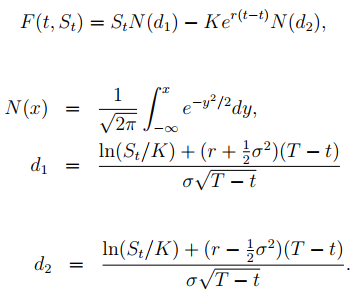
3. Opción de compra europea, suponiendo que los precios del activo son lognormales
4. Opción de venta europea, suponiendo que los precios del activo son lognormales

Entonces, ¿qué es la **volatilidad implícita**?

La volatilidad es una medida de la incertidumbre sobre el comportamiento futuro de un activo, que se mide habitualmente como la desviación típica de la rentabilidad de dicho activo. 

## Volatility smile 
-  Cuando las opciones con la misma fecha de vencimiento y el mismo activo subyacente, pero diferentes precios de ejercicio, se grafican por la volatilidad implícita, la tendencia es que ese gráfico muestre una sonrisa.
-  La sonrisa muestra que las opciones más alejadas 'in- or out-of-the-money' tienen la mayor volatilidad implícita.
- No todas las opciones tendrán una sonrisa de volatilidad implícita. Las opciones de acciones a corto plazo y las opciones relacionadas con la moneda tienen más probabilidades de tener una sonrisa de volatilidad

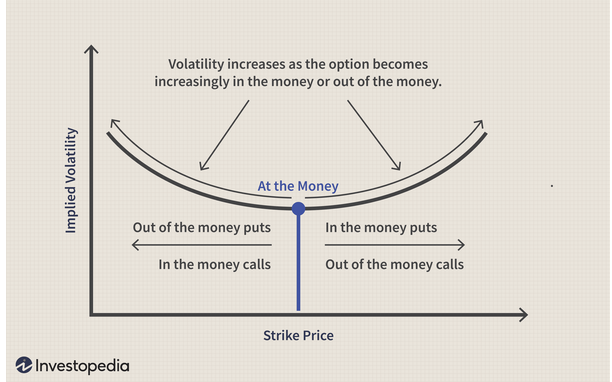

> Fuente: https://www.investopedia.com/terms/v/volatilitysmile.asp

> ### Validar para la `fecha = '2020-01-17'` y para la fecha `fecha = '2021-01-15'`

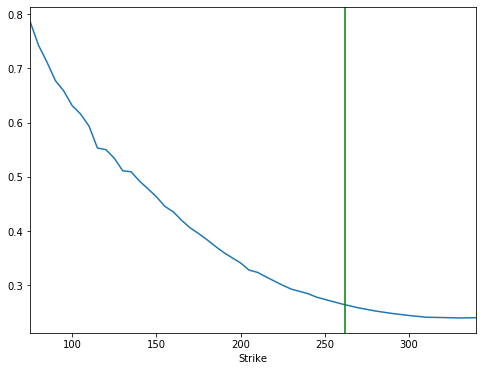

In [8]:
ax = call06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(call06.Underlying_Price.iloc[0], color='g');
# call06.Underlying_Price

In [9]:
put06 = aapl_opt.loc[(aapl_opt.Expiry==fecha1) & (aapl_opt.Type=='put')]
put06

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
13,75.0,2020-06-19,put,...,2019-11-21 18:57:58,2019-11-21 18:05:14,"{'contractSymbol': 'AAPL200619P00075000', 'str..."
21,80.0,2020-06-19,put,...,2019-11-21 18:57:58,2019-11-11 19:09:55,"{'contractSymbol': 'AAPL200619P00080000', 'str..."
29,85.0,2020-06-19,put,...,2019-11-21 18:57:58,2019-11-15 20:09:22,"{'contractSymbol': 'AAPL200619P00085000', 'str..."
37,90.0,2020-06-19,put,...,2019-11-21 18:57:58,2019-11-15 17:15:44,"{'contractSymbol': 'AAPL200619P00090000', 'str..."
45,95.0,2020-06-19,put,...,2019-11-21 18:57:58,2019-11-20 18:19:22,"{'contractSymbol': 'AAPL200619P00095000', 'str..."
...,...,...,...,...,...,...,...
1314,300.0,2020-06-19,put,...,2019-11-21 18:57:58,2019-11-20 18:16:20,"{'contractSymbol': 'AAPL200619P00300000', 'str..."
1355,310.0,2020-06-19,put,...,2019-11-21 18:57:58,2019-11-18 16:40:08,"{'contractSymbol': 'AAPL200619P00310000', 'str..."
1393,320.0,2020-06-19,put,...,2019-11-21 18:57:58,2019-11-21 16:31:54,"{'contractSymbol': 'AAPL200619P00320000', 'str..."
1425,330.0,2020-06-19,put,...,2019-11-21 18:57:58,2019-11-14 19:53:37,"{'contractSymbol': 'AAPL200619P00330000', 'str..."


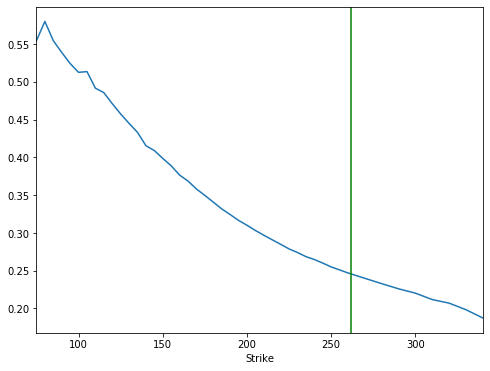

In [10]:
ax = put06.set_index('Strike').loc[:, 'IV'].plot(figsize=(8,6))
ax.axvline(put06.Underlying_Price.iloc[0], color='g')

Con lo que hemos aprendido, deberíamos ser capaces de crear una función que nos devuelva un `DataFrame` de `pandas` con los precios de cierre ajustados de ciertas compañías en ciertas fechas:
- Escribir la función a continuación

In [11]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

- Obtener como ejemplo los precios de cierre de Apple del año pasado hasta la fecha. Graficar...

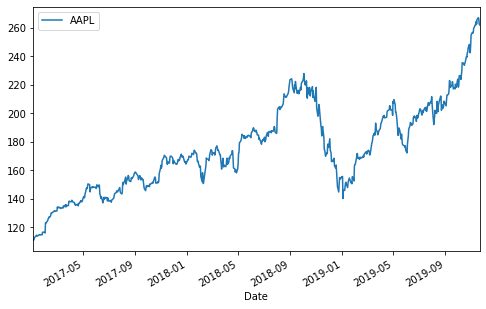

In [12]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

- Escribir una función que pasándole el histórico de precios devuelva los rendimientos logarítmicos:

In [38]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

- Graficar...

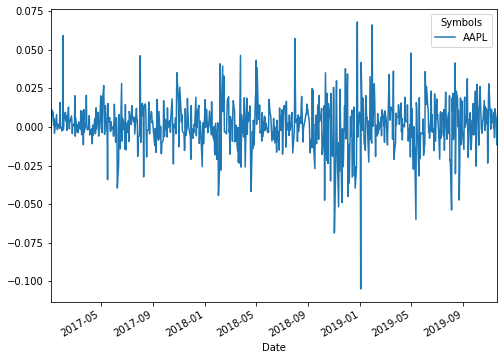

In [39]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

También, descargar datos de opciones de Apple:

In [40]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2019-11-22,262.5,call,AAPL191122C00262500,...,2019-11-21 19:51:34,2019-11-21 19:36:14,"{'contractSymbol': 'AAPL191122C00262500', 'str..."
2019-11-22,290.0,put,AAPL191122P00290000,...,2019-11-21 19:51:34,2019-11-08 20:46:18,"{'contractSymbol': 'AAPL191122P00290000', 'str..."
2019-11-22,175.0,put,AAPL191122P00175000,...,2019-11-21 19:51:34,2019-11-08 18:17:22,"{'contractSymbol': 'AAPL191122P00175000', 'str..."
2019-11-22,175.0,call,AAPL191122C00175000,...,2019-11-21 19:51:34,2019-11-11 17:40:28,"{'contractSymbol': 'AAPL191122C00175000', 'str..."
2019-11-22,232.5,put,AAPL191122P00232500,...,2019-11-21 19:51:34,2019-11-21 19:25:42,"{'contractSymbol': 'AAPL191122P00232500', 'str..."
...,...,...,...,...,...,...,...
2022-01-21,185.0,call,AAPL220121C00185000,...,2019-11-21 19:51:45,2019-11-20 17:08:35,"{'contractSymbol': 'AAPL220121C00185000', 'str..."
2022-01-21,185.0,put,AAPL220121P00185000,...,2019-11-21 19:51:45,2019-11-20 20:58:12,"{'contractSymbol': 'AAPL220121P00185000', 'str..."
2022-01-21,235.0,put,AAPL220121P00235000,...,2019-11-21 19:51:45,2019-11-20 16:33:23,"{'contractSymbol': 'AAPL220121P00235000', 'str..."


In [41]:
indice_opt = aapl_opt.loc[(aapl_opt.Type=='call') & (aapl_opt.Strike==240) & (aapl_opt.Expiry=='2021-01-15')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
852,240.0,2021-01-15,call,...,2019-11-21 19:51:41,2019-11-21 19:21:20,"{'contractSymbol': 'AAPL210115C00240000', 'str..."


In [42]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115C00240000',
 'strike': 240.0,
 'currency': 'USD',
 'lastPrice': 42.23,
 'change': -0.25,
 'percentChange': -0.58851224,
 'volume': 5,
 'openInterest': 2732,
 'bid': 42.1,
 'ask': 42.5,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1574364080,
 'impliedVolatility': 0.2805400315856933,
 'inTheMoney': True}

In [43]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  262.21


# Simulación de precios usando rendimiento simple y logarítmico 

* Comenzaremos por suponer que los rendimientos son un p.e. estacionario que distribuyen $\mathcal{N}(\mu,\sigma)$.

In [44]:
# Descargamos los precios de apple
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl

Symbols,AAPL
Date,
2017-01-03,110.954
2017-01-04,110.830
2017-01-05,111.393
2017-01-06,112.635
2017-01-09,113.667
...,...
2019-11-15,265.760
2019-11-18,267.100
2019-11-19,266.290


- **Rendimiento Simple**

In [45]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2019-11-15,0.012
2019-11-18,0.005
2019-11-19,-0.003


In [46]:
ndays = 109
nscen = 10
dates = pd.date_range(start='2019-11-12', periods = ndays)
dates

DatetimeIndex(['2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
               '2019-11-16', '2019-11-17', '2019-11-18', '2019-11-19',
               '2019-11-20', '2019-11-21',
               ...
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28'],
              dtype='datetime64[ns]', length=109, freq='D')

In [47]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,7,8,9
2019-11-12,1.583e-02,1.514e-03,3.517e-02,...,-2.255e-03,-2.635e-02,2.384e-02
2019-11-13,-1.279e-04,-1.345e-05,-2.997e-04,...,-1.561e-05,-1.961e-04,-3.601e-04
2019-11-14,-3.641e-06,1.894e-07,6.279e-06,...,3.469e-07,-2.583e-06,-2.256e-06
2019-11-15,-2.335e-08,1.325e-09,5.890e-08,...,9.479e-10,4.164e-08,-3.263e-08
2019-11-16,3.100e-10,-7.974e-12,1.887e-09,...,1.990e-11,1.123e-09,-1.191e-09
...,...,...,...,...,...,...,...
2020-02-24,5.290e-214,-6.642e-223,1.125e-212,...,-2.534e-220,2.441e-212,8.639e-209
2020-02-25,-6.836e-216,7.077e-226,1.168e-214,...,4.695e-222,7.844e-214,-2.116e-210
2020-02-26,-3.769e-218,8.779e-228,-3.170e-216,...,3.171e-224,1.469e-216,3.823e-212
2020-02-27,7.197e-220,4.399e-230,-2.880e-218,...,2.802e-226,3.642e-220,-1.725e-215


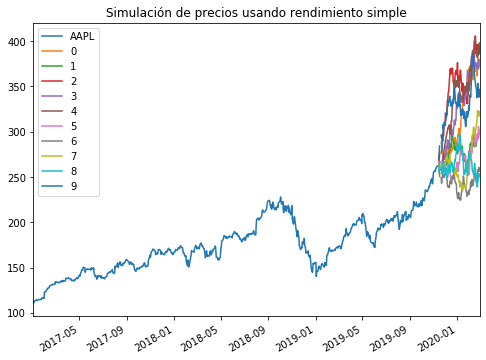

In [48]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

- **Rendimiento logarítmico**

0.3962149065980908

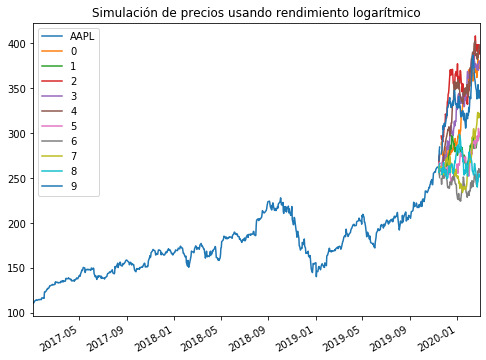

In [50]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())


# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

In [24]:
print('Las std usando rendimientos logarítmicos y simples son iguales')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son iguales


(0.015745903537109633, 0.015780204797634888)

## 2. Valuación usando simulación: modelo normal para los rendimientos

- Hallar media y desviación estándar muestral de los rendimientos logarítmicos

In [22]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0011816219242744839, 0.015725091632251064)

No se toma la media sino la tasa libre de riesgo
> Referencia: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield

In [23]:
# Tasa de bonos de 1 yr de fecha 11/01/19 -> 1.53%
r = 0.0153/360 # Tasa diaria

- Simularemos el tiempo de contrato (días=109) desde 2019-11-12 hasta 2020-02-29, 10 escenarios:
> Calculador de fechas: https://es.calcuworld.com/calendarios/calculadora-de-tiempo-entre-dos-fechas/
    
    - Generar fechas

In [24]:
ndays = 109
nscen = 10
dates = pd.date_range(start='2019-11-12', periods = ndays)
dates

DatetimeIndex(['2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15',
               '2019-11-16', '2019-11-17', '2019-11-18', '2019-11-19',
               '2019-11-20', '2019-11-21',
               ...
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28'],
              dtype='datetime64[ns]', length=109, freq='D')

- Generamos 10 escenarios de rendimientos simulados y guardamos en un dataframe

In [25]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2019-11-12,-6.119e-04,-0.008,0.044,...,0.015,-1.262e-02,-0.012
2019-11-13,1.118e-02,-0.012,0.060,...,0.030,-5.327e-04,-0.028
2019-11-14,3.253e-02,-0.025,0.052,...,0.019,2.210e-02,-0.026
2019-11-15,3.801e-02,-0.031,0.068,...,0.034,2.258e-02,-0.035
2019-11-16,1.353e-02,-0.032,0.089,...,0.036,4.765e-02,-0.033
...,...,...,...,...,...,...,...
2020-02-24,-2.166e-01,-0.221,0.237,...,0.071,5.837e-02,-0.155
2020-02-25,-2.172e-01,-0.213,0.253,...,0.080,4.250e-02,-0.183
2020-02-26,-1.930e-01,-0.190,0.247,...,0.071,4.154e-02,-0.166
2020-02-27,-2.272e-01,-0.178,0.229,...,0.104,2.196e-02,-0.146


- Con los rendimientos simulados, calcular los escenarios de precios respectivos:

In [26]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2019-11-12,261.770,259.835,273.795,...,265.819,258.646,258.862
2019-11-13,264.875,258.927,278.000,...,269.903,261.791,254.692
2019-11-14,270.591,255.481,275.937,...,266.908,267.782,255.094
2019-11-15,272.076,253.845,280.244,...,270.927,267.912,252.827
2019-11-16,265.498,253.647,286.308,...,271.666,274.712,253.440
...,...,...,...,...,...,...,...
2020-02-24,210.919,210.048,331.875,...,281.310,277.673,224.407
2020-02-25,210.801,211.719,337.178,...,283.638,273.301,218.041
2020-02-26,215.962,216.625,335.211,...,281.265,273.040,221.952
2020-02-27,208.693,219.259,329.402,...,290.697,267.746,226.321


- Graficar:

In [27]:
# sim_closes.plot(figsize=(8,6));

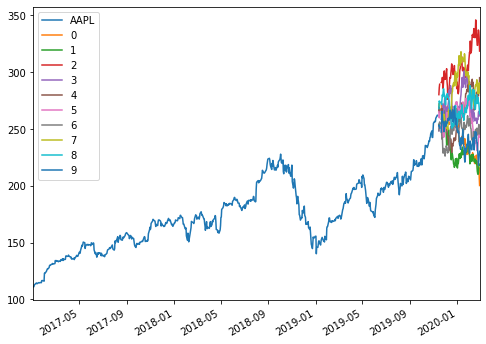

In [28]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [29]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115C00240000',
 'strike': 240.0,
 'currency': 'USD',
 'lastPrice': 42.48,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 41,
 'openInterest': 2732,
 'bid': 42.05,
 'ask': 42.4,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1574281192,
 'impliedVolatility': 0.28159287750244133,
 'inTheMoney': True}

In [52]:
from datetime import date
Hoy = date.today()
K=240  # strike price
ndays = 109 
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

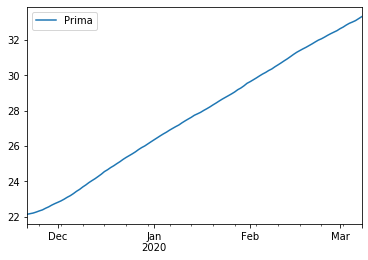

In [53]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
call.plot();

La valuación de la opción es:

In [54]:
call.iloc[-1]

Prima    33.314
Name: 2020-03-08 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [33]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(6.156508002609203, 6.875894849298887)
(6.156508002609203, 6.875894849298887)


## Precios simulados usando técnicas de reducción de varianza

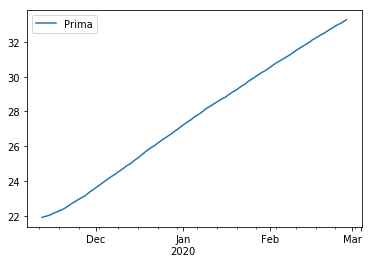

In [37]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
call = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(sim_closes2-strike,np.zeros([ndays,nscen])).T.mean()}, index=dates)
call.plot();

La valuación de la opción es:

In [38]:
call.iloc[-1]

Prima    33.274
Name: 2020-02-28 00:00:00, dtype: float64

Intervalo de confianza del 99%

In [39]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = call.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(32.91121407714147, 33.636495284891744)
(32.91121407714147, 33.636495284891744)


### Análisis de la distribución de los rendimientos

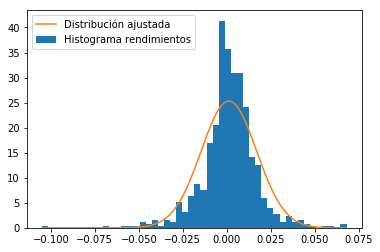

In [40]:
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()


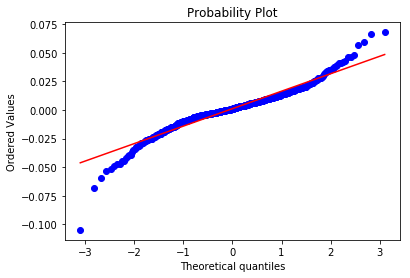

In [41]:
st.probplot(ren['AAPL'], dist='norm', plot=plt);

## 3. Valuación usando simulación: uso del histograma de rendimientos

Todo el análisis anterior se mantiene. Solo cambia la forma de generar los números aleatorios para la simulación montecarlo.

Ahora, generemos un histograma de los rendimientos diarios para generar valores aleatorios de los rendimientos simulados.

- Primero, cantidad de días y número de escenarios de simulación

In [42]:
ndays = 109 
nscen = 10

- Del histograma anterior, ya conocemos las probabilidades de ocurrencia, lo que se llamó como variable `y`

In [43]:
prob = y/np.sum(y)
values = x[1:]

- Con esto, generamos los números aleatorios correspondientes a los rendimientos (tantos como días por número de escenarios).

In [44]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2019-11-12,-0.025,-0.005,0.023,...,-0.012,0.023,0.002
2019-11-13,0.020,-0.001,0.002,...,-0.001,0.023,-0.025
2019-11-14,-0.005,-0.067,-0.008,...,0.016,-0.001,0.002
2019-11-15,0.002,0.020,0.020,...,-0.005,-0.008,0.009
2019-11-16,-0.005,0.002,-0.012,...,0.006,0.006,-0.008
...,...,...,...,...,...,...,...
2020-02-24,0.044,-0.032,0.002,...,0.013,-0.001,0.023
2020-02-25,-0.001,-0.005,0.009,...,0.030,0.013,0.006
2020-02-26,0.009,0.020,0.002,...,-0.005,0.006,0.016
2020-02-27,0.006,-0.001,0.016,...,0.009,-0.032,0.006


In [45]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2019-11-12,255.401,260.758,268.076,...,258.960,268.076,262.569
2019-11-13,260.462,260.462,268.699,...,258.666,274.335,255.995
2019-11-14,259.267,243.614,266.543,...,262.880,274.023,256.590
2019-11-15,259.869,248.441,271.824,...,261.674,271.824,258.972
2019-11-16,258.677,249.018,268.711,...,263.191,273.400,256.894
...,...,...,...,...,...,...,...
2020-02-24,268.803,360.698,239.802,...,355.741,402.923,350.852
2020-02-25,268.497,359.043,242.028,...,366.574,408.073,352.886
2020-02-26,270.990,366.157,242.591,...,364.892,410.439,358.635
2020-02-27,272.561,365.740,246.543,...,368.280,397.404,360.714


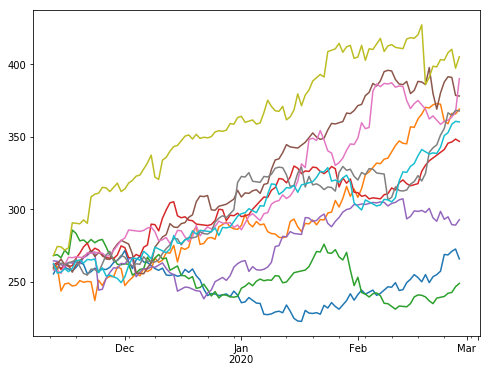

In [46]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5,1,'Simulación usando el histograma de los rendimientos')

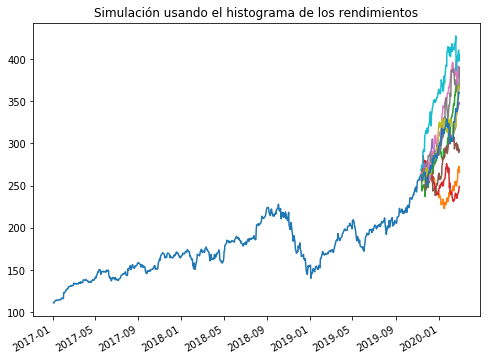

In [47]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [53]:
K=240
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

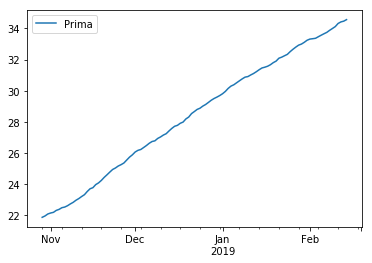

In [54]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
call_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(sim_closes_hist-strike,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
call_hist.plot();

In [55]:
call_hist.iloc[-1]

Prima    34.563
Name: 2019-02-14 00:00:00, dtype: float64

In [56]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115C00240000',
 'strike': 240.0,
 'currency': 'USD',
 'lastPrice': 42.02,
 'change': -0.579998,
 'percentChange': -1.3614978,
 'volume': 23,
 'openInterest': 2685,
 'bid': 41.65,
 'ask': 42.35,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1573589717,
 'impliedVolatility': 0.2777629597473144,
 'inTheMoney': True}

Intervalo de confianza del 95%

In [57]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = call_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)


(33.68642623764595, 35.43967297689947)
(33.68642623764595, 35.43967297689947)


# <font color = 'red'> Tarea: </font>

Replicar el procedimiento anterior para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez and modify by Oscar Jaramillo Z.
</footer>